Ex1 - Getting and knowing your Data

Check out World Food Facts Exercises Video Tutorial to watch a data scientist go through the exercises

Step 1. Go to https://www.kaggle.com/openfoodfacts/world-food-facts/data

Step 2. Download the dataset to your computer and unzip it.

In [1]:
import pandas as pd
import numpy as np

Step 3. Use the tsv file and assign it to a dataframe called food

In [2]:
df = pd.read_csv("/datasets/ml01/en.openfoodfacts.org.products.tsv", sep = "\t", low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/ml01/en.openfoodfacts.org.products.tsv'

Step 4. See the first 5 entries

In [ ]:
df.head()

Step 5. What is the number of observations in the dataset?

In [ ]:
df.shape[0]

Step 6. What is the number of columns in the dataset?

In [ ]:
df.shape[1]

Step 7. Print the name of all the columns.

In [ ]:
cols = list(df.columns)
cols

Step 8. What is the name of 105th column?

In [ ]:
cols[104]

Step 9. What is the type of the observations of the 105th column?

In [ ]:
df["-glucose_100g"].dtype

Step 10. How is the dataset indexed?

In [ ]:
df.index

Step 11. What is the product name of the 19th observation?

In [ ]:
df["product_name"][18]

Ex2 - Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
Step 1. Import the necessary libraries

In [3]:
import pandas as pd

Step 2. Import the dataset from this address. https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv 

In [4]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep = "\t")

Step 4. See the first 10 entries

In [5]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [6]:
# Solution 1
chipo.shape[0]

4622

In [7]:
# Solution 2
len(chipo.index)

4622

Step 6. What is the number of columns in the dataset?

In [8]:
len(list(chipo.columns))

5

Step 7. Print the name of all the columns.

In [9]:
list(chipo.columns)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

Step 8. How is the dataset indexed?

In [10]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?

In [11]:
highest_quant = sorted(chipo["quantity"], reverse = True)[0]
hq_mask = chipo["quantity"] == highest_quant
chipo["item_name"][hq_mask].iloc[0]

'Chips and Fresh Tomato Salsa'

Step 10. For the most-ordered item, how many items were ordered?

In [12]:
highest_quant

15

Step 11. What was the most ordered item in the choice_description column?

In [13]:
is_na_mask = chipo["choice_description"].isna()
valid_vals = chipo["choice_description"][~is_na_mask]

In [14]:
from collections import Counter
all_items = []
for value in valid_vals:
    all_items.extend([item.strip().strip("[").strip("]") for item in value.split(",")])
count = Counter(all_items)
count.most_common(1)

[('Rice', 2389)]

Step 12. How many items were orderd in total?

In [15]:
sum(chipo["quantity"])

4972

Step 13. Turn the item price into a float

Step 13.a. Check the item price type

In [16]:
help(chipo["item_price"].dtype)

Help on dtype[object_] object:

class dtype[object_](dtype)
 |  Method resolution order:
 |      dtype[object_]
 |      dtype
 |      builtins.object
 |  
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from numpy._DTypeMeta
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from dtype:
 |  
 |  __bool__(self, /)
 |      True if self else False
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __len__(self, /)
 |      Return len(self).
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __mul__(self, value, /)
 |   

In [17]:
chipo["item_price"].dtype.char

'O'

Step 13.b. Create a lambda function and change the type of item price

In [18]:
f = lambda item: float(item.strip().strip('$'))

Step 13.c. Apply using map

In [ ]:
chipo["item_price"] = chipo["item_price"].map(f, na_action='ignore')

Step 14. How much was the revenue for the period in the dataset?

In [ ]:
chipo["revenue"] = chipo.apply(lambda row: row.quantity*row.item_price, axis=1)
total_rev = chipo["revenue"].sum()
total_rev

Step 15. How many orders were made in the period?

In [ ]:
total_orders = len(set(chipo["order_id"]))
total_orders

Step 16. What is the average revenue amount per order?

In [ ]:
# Solution 1
total_rev/total_orders

Step 17. How many different items are sold?

In [ ]:
len(set(chipo["item_name"]))

7. Numpy exercises

In [ ]:
import numpy as np
import seaborn as sns
rng = np.random.RandomState(2022)

Create a null vector of size 10

In [ ]:
X = np.zeros(10)

Create a vector with values ranging from 0 to 100

In [ ]:
X = np.arange(0, 101)
X

Create a 10x10 matrix with random values and find the minimum, maximum, and mean values. Normalize the said matrix

In [ ]:
X = rng.random((10, 10))
mx = np.max(X)
mn = np.min(X)
mean = np.mean(X)
print(mx, mn, mean)

Consider a random 10x2 matrix representing cartesian coordinates, convert them to polar coordinates

In [ ]:
r = lambda cc: np.sqrt(cc[0]**2 + cc[1]**2)
th = lambda cc: np.arctan(cc[1]/cc[0])

car = rng.random((10, 2))
R = np.apply_along_axis(r, 1, car)
Th = np.apply_along_axis(th, 1, car)

pol = np.column_stack((R, Th))

Create random vector of size 10 and replace the maximum value by 0

In [ ]:
X = rng.random(10)
X[X.argmax()] = 0
X

Create a structured array with x and y coordinates covering the [0,1]x[0,1] area.

In [ ]:
nx, ny = (2, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y, indexing='ij')

print(" x     y")
print("----------")
for i in range(nx):
    for j in range(ny):
        print(xv[i, j], "|", yv[i, j])
        print("----------")

Having a scalar x and a random vector v, find a value in v that is closest to x

In [19]:
x = 26
v = rng.randint(0, 100, 10)
c = v[np.abs(v - x).argmin()]
c

NameError: name 'rng' is not defined

Create a structured array representing a position (x,y) and a color (r,g,b).

In [ ]:
# I am not quite sure what is asked here

Consider a random vector with shape (100,2) representing coordinates, find point by point distances and put them in a (100,100) array.

In [ ]:
X = rng.random((100, 2))
D = np.empty((100, 100))

for i in range(100):
    for j in range(100):
        D[i, j] = np.sqrt((X[i, 0] - X[j, 0])**2 + (X[i, 1] - X[j, 1])**2)
D

Create a (100,100) matrix that looks like a Gaussian distribution, i.e. the values in the middle of the matrix have the highest probability, while the values toward the edges have the lowest probablity. Plot the matrix to confirm correctness.

In [ ]:
from scipy.stats import multivariate_normal

In [ ]:
x, y = np.mgrid[-1:1:.02, -1:1:.02]
pos = np.dstack((x, y))

m = np.array([0, 0])
cov = np.array([[1, 0], [0, 1]])
mgd = multivariate_normal(mean=m, cov=cov)

sns.heatmap(mgd.pdf(pos));

Create a random (100, 100) matrix with values from 0 to 1. Turn all values lower than 0.5 into 0.0

In [ ]:
X = rng.random((100, 100))
X[X < .5] = 0

Sort an array by the nth column.

In [ ]:
X = rng.random((100, 100))
n = 1
Xs = X[np.argsort(X[:, n])]

    Load the csv file into numpy array.

File:

1, 2, 3, 4, 5
6,  ,  , 7, 8
 ,  , 9,10,11

In [20]:
np.genfromtxt('test.csv', delimiter=',')

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6., nan, nan,  7.,  8.],
       [nan, nan,  9., 10., 11.]])

Subtract the mean of each row of a matrix.

In [ ]:
X = rng.random((100, 100))
N = X - X.mean(1)
print("Check:\n", X[0, 1], X.mean(1)[0], N[0, 1])

Considering a four dimensions array, how to get sum over the last two axis at once?

In [ ]:
X = rng.random((10, 10, 10, 10))
X.sum((2, 3))

Do a dot product of two matrices and print only the diagonal values.

In [ ]:
X = rng.random((10, 10))
Y = rng.random((10, 10))

np.diagonal(X @ Y)

Swap two rows of a matrix.

In [ ]:
X = np.array([[1, 2], [3, 4]])
X[[0, 1]] = X[[1, 0]]
X

Find a matrix rank.

In [ ]:
X = np.array([[1, 2], [3, 4]])
np.linalg.matrix_rank(X)

find the most frequent value in an array

In [ ]:
X = np.array([[1, 2], [3, 4], [3, 3]])
vals, counts = np.unique(X, return_counts=True)
vals[np.argmax(counts)]

Plotting exercises using matplotlib and seaborn - a

The basics

matplotlib and seaborn are plotting library that play really well with the other packages such as numpy and pandas. In these exercises we will go through the basics of how to install them, import them and use them.

Installing and importing

In Colab, you will see that these tools are already installed.

In [21]:
# The usual way to import them:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's also import
import numpy as np
import pandas as pd

My first matplotlib plot

The most basic matplotlib plot uses two numpy arrays.

Exercise 1: Plot the figure for the function f(x) = cos(x) for x between 0 and 2*np.pi.

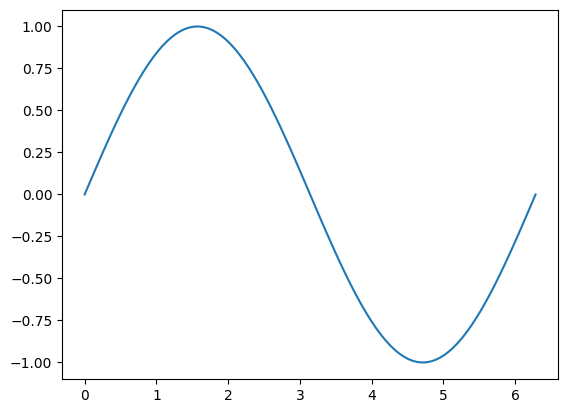

In [22]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.plot(x, y);

Exercise 2: change the line style to be dotted, and the color to be black.

In [ ]:
plt.plot(x, y, ".k");

Exercise 3: Use a for loop to plot sin(x + k) for k between 0 and 5

In [ ]:
for k in range(5):
    plt.plot(x, np.sin(x + k))

Exercise 4: In the previous plot, change the y axis such that only -1 and 1 appear in the ticks. Set appropiate titles, y-labels and x-labels.

In [ ]:
for k in range(5):
    plt.plot(x, np.sin(x + k))

plt.yticks([-1, 1]);
plt.title("Multiple sine waves");
plt.xlabel("Domain");
plt.ylabel(r"$y=\sin(x + k)$");

More advanced plots

In these next plots, we will use more methods of matplotlib and more keyword arguments therein.

Exercise 5: Create a vector of 1000 samples of a uniform distribution using np.random.random, and plot a histogram of them.

In [ ]:
x = np.random.random(1000);
plt.hist(x);

Exercise 6: Change the color of the previous plot, and change the width of the rectangles.

In [ ]:
plt.hist(x, color="#8CADA7", rwidth=0.8);

Let's talk about creating subplots. For these exercises we will load a dataset from https://data.cityofnewyork.us/api/views/7yig-nj52/rows.csv

In [23]:
math_scores = pd.read_csv(
    "https://data.cityofnewyork.us/api/views/7yig-nj52/rows.csv"
)
math_scores.shape

(1568, 16)

Exercise 7:

    What are the columns and data types in the DataFrame math_scores?

In [ ]:
math_scores.dtypes

Let's modify this dataframe to focus on only one district:

In [ ]:
math_scores = math_scores[math_scores["District"] == 1]

    Use plt.subplots to create a 2x2 plot grid.
    Plot in these 4 subplots the variable number tested against year for the grades 5, 6, 7, 8.

In [ ]:
fig, axes = plt.subplots(2, 2, sharey=True, sharex=True)

# A silly way of doing it.
# df = math_scores[math_scores["Grade"] == "5"]
# axes[0, 0].plot(df["Year"], df["Number Tested"])
# axes[0, 0].set_title("Grade 5")

# df = math_scores[math_scores["Grade"] == "6"]
# axes[0, 1].plot(df["Year"], df["Number Tested"])
# axes[0, 1].set_title("Grade 6")

# df = math_scores[math_scores["Grade"] == "7"]
# axes[1, 0].plot(df["Year"], df["Number Tested"])
# axes[1, 0].set_title("Grade 7")

# df = math_scores[math_scores["Grade"] == "8"]
# axes[1, 1].plot(df["Year"], df["Number Tested"])
# axes[1, 1].set_title("Grade 8")


# A better way of doing it
axes = [axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]]
for ax, grade in zip(axes, ["5", "6", "7", "8"]):
    df = math_scores[math_scores["Grade"] == grade]
    ax.plot(df["Year"], df["Number Tested"])
    ax.set_title(f"Grade {grade}")

plt.tight_layout()

Using seaborn

Seaborn is a plotting library that focuses on making some common statistics plots (e.g. violin plots, box plots, scatters, kernel density estimations...) easier to get.

In the following examples we will use a DataFrame provided by seaborn itself:

In [ ]:
df_penguins = sns.load_dataset("penguins")

Exercise 8:

    What are the columns and data types in df_penguins?
    Clean this DataFrame from NaN values (hint: use dropna()). How many rows were lost?

In [ ]:
df_penguins.dtypes

Exercise 9: Use sns.pairplot to understand the relationship between the columns "bill_length_mm", "bill_depth_mm", "flipper_length_mm". Illuminate by species.

In [ ]:
sns.pairplot(
    data=df_penguins,
    hue="species",
    vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
);

Plotting exercises with matplotlib and Seaborn - b

1. Plotting simple functions

Example: plotting sin(x ** 2) for x between -pi and pi:

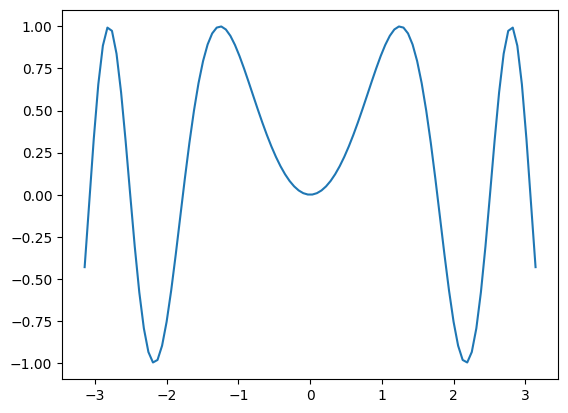

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x ** 2)

plt.plot(x, y);

Exercise 1: Plot the function (x ** 2) * sin(1/x) in the interval [1e-5, pi].

In [ ]:
x = np.linspace(10**(-5), np.pi, 100)
y = np.sin((x ** 2)* np.sin(1/x))

plt.plot(x, y);

Exercise 2: In the previous plot

    Change the linestyle to dotted, and the color to #4A5859.
    Add an appropiate title.

In [ ]:
plt.plot(x, y, ':', color='#4A5859');
plt.title('Plot of $f(x) = (x^2) * sin(1/x)$');

Exercise 3: In the plot of exercise 1, remove all ticks in the x axis. (Hint)
https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot/12998531#12998531 

In [ ]:
plt.plot(x, y, ':', color='#4A5859');
plt.title('Plot of $f(x) = (x^2) * sin(1/x)$');
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False  # labels along the bottom edge are off
)

2. Using subplots

In the following exercises we will replicate this image:

For that, we will numpy's random numbers.

In [ ]:
np.random.seed(1)
x = np.random.normal(0, 1, size=(10000,))
y = np.random.normal(0, 1, size=(10000,))